# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [127]:
import pandas as pd
import numpy as np

note:-Web scraping for this task is done in another notebook

In [128]:
import pandas as pd

# Replace the file path with your actual file path
df = pd.read_csv(r"path", encoding="ISO-8859-1")

# Display the first few rows of the DataFrame
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [129]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [130]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [48]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [131]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


Based on the provided columns, it seems that the column 'booking_complete' is likely to be the label or target variable for the predictive model. This column probably indicates whether a booking was successfully completed or not. Your goal would be to predict whether a customer will complete a booking based on the other features or variables in the dataset.







Certainly, I can explain the meanings of the columns you've provided:

# purchase_lead:

This column likely represents the lead time or the time interval between when a customer expresses interest in making a booking and when the booking is actually completed. A longer purchase lead time might indicate that customers plan their trips well in advance, while a shorter lead time might suggest last-minute bookings.

# length_of_stay:
This column probably indicates the duration of the customer's stay, which is the amount of time the customer plans to spend at the travel destination. It could be measured in days or any other suitable time unit.

# flight_hour:
This column likely represents the hour of the day at which the flight is scheduled to depart. It can provide insights into customer preferences for flight timings, such as early morning, midday, or evening departures.

# flight_duration:
This column probably represents the duration of the flight itself, indicating the time it takes to travel from the departure airport to the arrival airport. It could be measured in hours and minutes.

# Encoding categorical  Data

here i am encoding sales_channel and trip_type feature and dropping route and booking_origin as they are not siginificant features

In [132]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset into a pandas DataFrame
data = df.copy()  # Create a copy of the DataFrame


# One-hot encoding for 'sales_channel' and 'trip_type' columns
encoded_data = pd.get_dummies(data, columns=['sales_channel', 'trip_type'])

# Drop original categorical columns
columns_to_drop = ['route', 'booking_origin', 'sales_channel', 'trip_type']
data.drop(columns_to_drop, axis=1, inplace=True)


In [134]:
data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,6,1,0,0,5.52,0
1,1,112,20,3,6,0,0,0,5.52,0
2,2,243,22,17,3,1,1,0,5.52,0
3,1,96,31,4,6,0,0,1,5.52,0
4,2,68,22,15,3,1,0,1,5.52,0


In [98]:
X = data.drop(['booking_complete'], axis=1)  # Remove the target column
y = data['booking_complete']


As you can see that our label data is imbalanced so we have to balance it first before training our model

In [99]:
y.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [135]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

y_resampled.value_counts()


0    42522
1    42522
Name: booking_complete, dtype: int64

In [108]:
X_resampled.shape,y_resampled.shape

((85044, 9), (85044,))

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [110]:
X_train.shape,y_train.shape

((68036, 9), (68036,))

In [137]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset and separate features (X) and target variable (y)
# X = Your feature matrix
# y = Your target vector

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Predict the target values on the training set
y_train_pred = rf_classifier.predict(X_train)

# Calculate the accuracy of the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Test Accuracy: 0.8736551237580105
Training Accuracy: 0.9995590504887191
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      8444
           1       0.89      0.86      0.87      8565

    accuracy                           0.87     17009
   macro avg       0.87      0.87      0.87     17009
weighted avg       0.87      0.87      0.87     17009



In [138]:
# Get feature importance scores
feature_importances = rf_classifier.feature_importances_


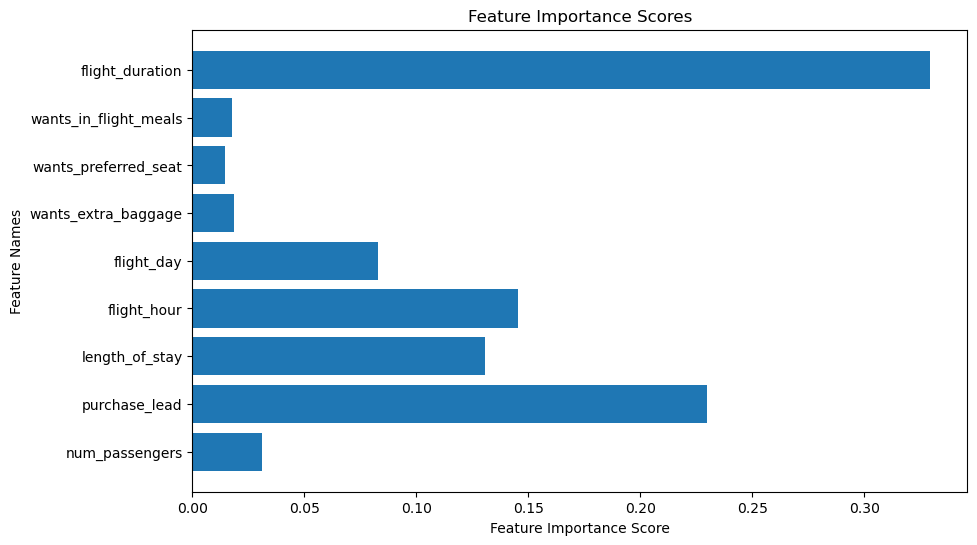

In [139]:
import matplotlib.pyplot as plt

# Get the list of feature names (assuming X_train.columns contains feature names)
feature_names = X_train.columns

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Names')
plt.title('Feature Importance Scores')
plt.show()


Applying Kfold to see if the accuracy is still holding to different data

In [103]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen model
import numpy as np

# Assuming you have X_resampled and y_resampled after balancing the dataset

# Reset the indices of X_resampled and y_resampled
X_resampled.reset_index(drop=True, inplace=True)
y_resampled.reset_index(drop=True, inplace=True)

# Define the number of folds
num_folds = 5

# Define the cross-validation technique (KFold)
cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize your model (Random Forest Classifier in this example)
model = RandomForestClassifier()

# Initialize lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform k-fold cross-validation and collect metrics
for train_index, test_index in cv.split(X_resampled):
    X_train, X_test = X_resampled.loc[train_index], X_resampled.loc[test_index]
    y_train, y_test = y_resampled.loc[train_index], y_resampled.loc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Print metrics for each fold
for fold in range(1, num_folds + 1):
    print(f"Fold {fold}:")
    print(f"  Accuracy = {accuracy_scores[fold-1]:.4f}")
    print(f"  Precision = {precision_scores[fold-1]:.4f}")
    print(f"  Recall = {recall_scores[fold-1]:.4f}")
    print(f"  F1-score = {f1_scores[fold-1]:.4f}")
    print()

# Calculate and print mean metrics and standard deviations
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)

print("Mean Metrics:")
print(f"  Accuracy = {mean_accuracy:.4f}, Std Deviation = {std_accuracy:.4f}")
print(f"  Precision = {mean_precision:.4f}, Std Deviation = {std_precision:.4f}")
print(f"  Recall = {mean_recall:.4f}, Std Deviation = {std_recall:.4f}")
print(f"  F1-score = {mean_f1:.4f}, Std Deviation = {std_f1:.4f}")


Fold 1:
  Accuracy = 0.8729
  Precision = 0.8860
  Recall = 0.8579
  F1-score = 0.8718

Fold 2:
  Accuracy = 0.8706
  Precision = 0.8795
  Recall = 0.8592
  F1-score = 0.8692

Fold 3:
  Accuracy = 0.8664
  Precision = 0.8755
  Recall = 0.8526
  F1-score = 0.8639

Fold 4:
  Accuracy = 0.8751
  Precision = 0.8889
  Recall = 0.8584
  F1-score = 0.8734

Fold 5:
  Accuracy = 0.8723
  Precision = 0.8850
  Recall = 0.8538
  F1-score = 0.8691

Mean Metrics:
  Accuracy = 0.8715, Std Deviation = 0.0029
  Precision = 0.8830, Std Deviation = 0.0048
  Recall = 0.8564, Std Deviation = 0.0027
  F1-score = 0.8695, Std Deviation = 0.0032


# Lets create a visualisation to interpret how each variable contributed to the model

In [60]:
data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,6,1,0,0,5.52,0
1,1,112,20,3,6,0,0,0,5.52,0
2,2,243,22,17,3,1,1,0,5.52,0
3,1,96,31,4,6,0,0,1,5.52,0
4,2,68,22,15,3,1,0,1,5.52,0


In [61]:
# Calculating and Displaying importance using the eli5 library
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(x_test,y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.2194 ± 0.0049,flight_duration
0.1173 ± 0.0071,length_of_stay
0.0924 ± 0.0041,purchase_lead
0.0666 ± 0.0041,flight_day
0.0601 ± 0.0041,flight_hour
0.0441 ± 0.0029,num_passengers
0.0410 ± 0.0015,wants_in_flight_meals
0.0332 ± 0.0022,wants_preferred_seat
0.0253 ± 0.0035,wants_extra_baggage


In [111]:
print(X_train.shape, y_train.shape)

(68036, 9) (68036,)


In [69]:
data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,6,1,0,0,5.52,0
1,1,112,20,3,6,0,0,0,5.52,0
2,2,243,22,17,3,1,1,0,5.52,0
3,1,96,31,4,6,0,0,1,5.52,0
4,2,68,22,15,3,1,0,1,5.52,0


Data Artifact: An abrupt fall to 0 might also indicate that there is very little data available for flight_duration values around that point. It's important to ensure that the observed behavior is not driven by data limitations.



In [116]:
X_train["flight_duration"].describe()

count    68036.000000
mean         7.118295
std          1.465782
min          4.670000
25%          5.620000
50%          7.000000
75%          8.670000
max          9.500000
Name: flight_duration, dtype: float64

In [117]:
data.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,6,1,0,0,5.52,0
1,1,112,20,3,6,0,0,0,5.52,0
2,2,243,22,17,3,1,1,0,5.52,0
3,1,96,31,4,6,0,0,1,5.52,0
4,2,68,22,15,3,1,0,1,5.52,0


In [121]:
X_train.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration'],
      dtype='object')

In [124]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 5.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
100%|===================| 34011/34016 [178:13<00:01]         

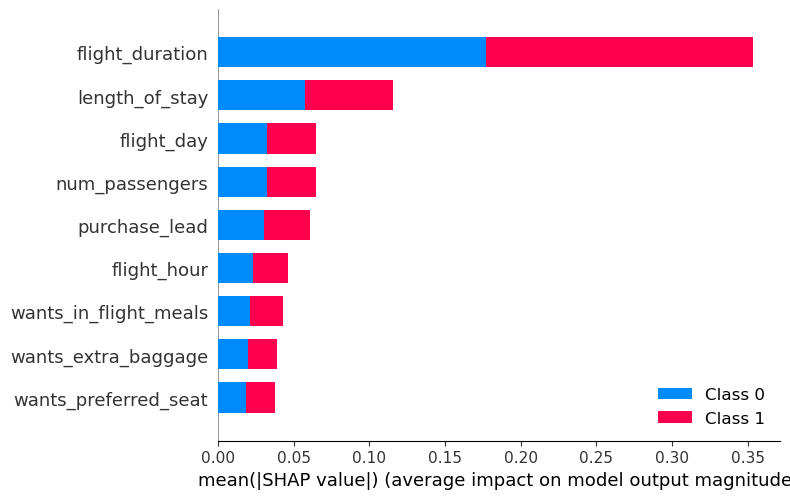

In [125]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer
explainer = shap.Explainer(clf, X_train)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

plt.savefig("mean shap values of features")
plt.show()


100%|===================| 34004/34016 [33:01<00:00]        

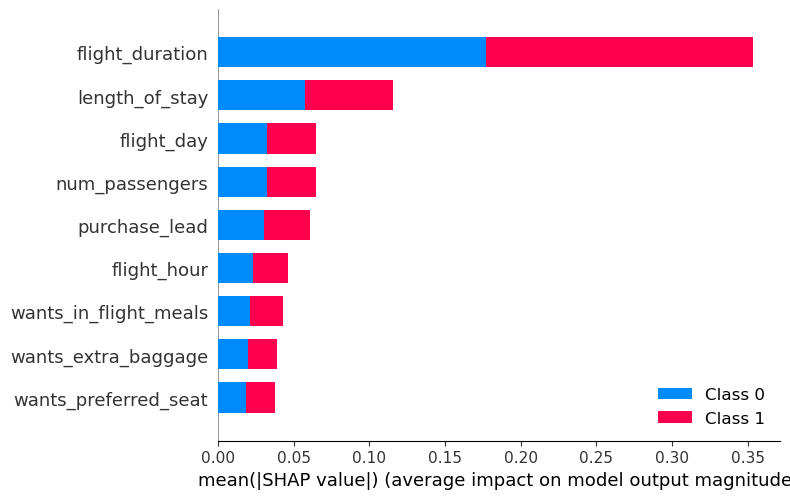

<Figure size 640x480 with 0 Axes>

In [126]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer
explainer = shap.Explainer(clf, X_train)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

plt.savefig("mean shap values of features")
plt.show()


insights

1)Travel Time Impact: The duration of a flight directly affects passengers' decisions. Longer flight durations might deter potential passengers who are looking for convenient and quick travel options. Passengers often consider flight duration as a key factor in their decision-making process.

2)Time Sensitivity: Passengers might have time-sensitive travel plans, such as business trips or important events. A longer flight duration could lead to conflicts with their schedules, making them less likely to book the flight.

3)Travel Purpose: The duration of the stay at the destination can be a key factor in determining whether a passenger decides to book a flight. Passengers traveling for short business trips might prefer shorter lengths of stay, while those traveling for leisure might opt for longer stays.


Conclusion:-
1)Passengers give preference to flights with shorter duration.
2)Lenght of stay plays acrucial role in decision making of booking a flight or not as business decsion can me made according to these 3 points.

2)Preferential Treatment: Airlines or travel providers might offer certain perks or discounts based on the length of stay. Passengers could be influenced by these incentives.

